In [0]:
# Credits: https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
# LSTM for sequence classification in the IMDB dataset
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
# fix random seed for reproducibility
np.random.seed(7)


In [0]:
import pickle
import pandas as pd
import matplotlib.pyplot as py
import seaborn as sns
import sqlite3

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from collections import Counter
from operator import itemgetter

In [0]:
def plot_epoch_vs_loss(epochs,test_loss,train_loss,colors=['b']):
  
    '''
    It is to plot epoch vs Train & Test Loss. 
    
    '''
    py.figure(figsize=(15,5))
    py.title('epoch vs Train & Test Loss')
    py.xlabel('epoch') ; 
    py.ylabel('Categorical Crossentropy Loss')
    py.plot(epochs, test_loss, 'b', label="Test Loss")
    py.plot(epochs, train_loss, 'r', label="Train Loss")
    py.legend()
    py.grid(b=True)
    py.show()

In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
conn=sqlite3.connect('/content/drive/My Drive/Colab Notebooks/final.sqlite')
all_reviews=pd.read_sql_query('select cleanedtext,Score,Time from Reviews',conn)
conn.close()

all_reviews.sort_values('Time',axis=0,inplace=True)
print(all_reviews.head(10))
all_reviews_array=all_reviews.values
all_reviews['Score'].value_counts()

                                           cleanedtext     Score       Time
0    witti littl book make son laugh loud recit car...  positive  939340800
30   rememb see show air televis year ago child sis...  positive  940809600
424  beetlejuic well written movi everyth excel act...  positive  944092800
330  twist rumplestiskin captur film star michael k...  positive  944438400
423  beetlejuic excel funni movi keaton hilari wack...  positive  946857600
245  one movi movi collect fill comedi action whate...  positive  947376000
308  alway enjoy movi funni entertain hesit pick cl...  negative  948240000
215  bought apart infest fruit fli hour trap mani f...  positive  948672000
261  happen say name three time michael keaten star...  positive  951523200
325  get crazi look beatlejuic french version video...  positive  959990400


positive    307061
negative     57110
Name: Score, dtype: int64

In [0]:
X=all_reviews_array[:,0]
y=all_reviews_array[:,1]

y = (y=='positive').astype(int)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2,shuffle=False)

In [7]:
print(len(X_train))
print(len(X_test))

254919
109252


In [0]:
word_freq_dict_train={}
# Iterating through the training set to get the count of each word.
for i in range(0,len(X_train)):
    words_in_review=[]
    review=X_train[i]
    words_in_review=review.lower().split()
    word_freq_dict_train=Counter(word_freq_dict_train)+Counter(words_in_review)

In [0]:
pickle_out = open("word_freq_dict_train.pickle","wb")
pickle.dump(word_freq_dict_train, pickle_out)
pickle_out.close()

In [0]:
pickle_in = open("word_freq_dict_train.pickle","rb")
word_freq_dict_train = pickle.load(pickle_in)
pickle_in.close()


In [10]:
print(word_freq_dict_train)

Counter({'like': 117973, 'tast': 113244, 'flavor': 90160, 'good': 88739, 'one': 81568, 'use': 81506, 'love': 80493, 'product': 80328, 'great': 77306, 'tri': 72252, 'tea': 69694, 'coffe': 63869, 'make': 60286, 'get': 59506, 'food': 52752, 'would': 49901, 'buy': 46790, 'time': 44942, 'amazon': 44097, 'eat': 43284, 'realli': 42708, 'order': 40488, 'much': 39646, 'price': 39147, 'find': 38896, 'also': 38239, 'best': 36573, 'littl': 36002, 'bag': 34732, 'even': 34728, 'store': 34010, 'well': 33116, 'dog': 32719, 'drink': 32658, 'chocol': 31418, 'better': 30469, 'mix': 30468, 'box': 30461, 'year': 27732, 'day': 27720, 'sugar': 27230, 'recommend': 26708, 'sweet': 26271, 'first': 26029, 'look': 25784, 'water': 25627, 'want': 25520, 'found': 25134, 'packag': 25019, 'cup': 24709, 'give': 24617, 'brand': 24159, 'high': 23721, 'purchas': 23675, 'treat': 23383, 'think': 22849, 'made': 22579, 'way': 22501, 'bought': 22269, 'enjoy': 22252, 'work': 21883, 'delici': 20961, 'add': 20904, 'need': 20667, 

In [11]:
# Taking top 5000 words from the count dictionary
top_words=5000
word_freq_list_train=sorted(word_freq_dict_train.items(),key=itemgetter(1),reverse=True)[:top_words]
print(word_freq_list_train[0:10])

[('like', 117973), ('tast', 113244), ('flavor', 90160), ('good', 88739), ('one', 81568), ('use', 81506), ('love', 80493), ('product', 80328), ('great', 77306), ('tri', 72252)]


In [12]:
word_index_dict={}
# Replacing the count of each word with the index
for i in range(0,top_words):
    word=word_freq_list_train[i][0]
    word_index_dict[word]=i+1
    
print(word_index_dict)

{'like': 1, 'tast': 2, 'flavor': 3, 'good': 4, 'one': 5, 'use': 6, 'love': 7, 'product': 8, 'great': 9, 'tri': 10, 'tea': 11, 'coffe': 12, 'make': 13, 'get': 14, 'food': 15, 'would': 16, 'buy': 17, 'time': 18, 'amazon': 19, 'eat': 20, 'realli': 21, 'order': 22, 'much': 23, 'price': 24, 'find': 25, 'also': 26, 'best': 27, 'littl': 28, 'bag': 29, 'even': 30, 'store': 31, 'well': 32, 'dog': 33, 'drink': 34, 'chocol': 35, 'better': 36, 'mix': 37, 'box': 38, 'year': 39, 'day': 40, 'sugar': 41, 'recommend': 42, 'sweet': 43, 'first': 44, 'look': 45, 'water': 46, 'want': 47, 'found': 48, 'packag': 49, 'cup': 50, 'give': 51, 'brand': 52, 'high': 53, 'purchas': 54, 'treat': 55, 'think': 56, 'made': 57, 'way': 58, 'bought': 59, 'enjoy': 60, 'work': 61, 'delici': 62, 'add': 63, 'need': 64, 'thing': 65, 'know': 66, 'sinc': 67, 'say': 68, 'two': 69, 'pack': 70, 'nice': 71, 'differ': 72, 'favorit': 73, 'cat': 74, 'review': 75, 'bit': 76, 'could': 77, 'lot': 78, 'come': 79, 'mani': 80, 'still': 81, 'm

In [0]:
X_final_train=[]
# Iterating through each review in training set
for i in range(0,len(X_train)):
    words_in_review=[]
    temp=[]
    review=X_train[i]
    words_in_review=review.lower().split()
    #Iterating through each word in review to convert the text review to numerical vector with index of frequencies
    for j in range(0,len(words_in_review)):
        if words_in_review[j] in word_index_dict:
            temp.append(word_index_dict.get(words_in_review[j]))
        else:
            temp.append(2)
    X_final_train.append(temp)      

In [0]:
X_final_test=[]
# Iterating through each review in test set
for i in range(0,len(X_test)):
    words_in_review=[]
    temp=[]
    review=X_test[i]
    words_in_review=review.lower().split()
    #Iterating through each word in review to convert the text review to numerical vector with index of frequencies
    for j in range(0,len(words_in_review)):
        if words_in_review[j] in word_index_dict:
            temp.append(word_index_dict.get(words_in_review[j]))
        else:
            temp.append(2)
    X_final_test.append(temp)      

In [15]:
print(X_final_train[0:5])
print(X_final_test[0:5])

[[2, 28, 1003, 13, 337, 2373, 3104, 2, 1072, 1216, 526, 101, 3602, 2, 783, 2, 1697, 2, 7, 171, 761, 1003, 1009, 2698, 1154, 1003, 1495, 1804, 337, 81, 245, 2, 1331, 1640], [502, 132, 658, 993, 2, 39, 293, 927, 1147, 554, 59, 40, 3599, 107, 6, 3295, 1003, 4772, 1940, 3497, 4596, 316, 120, 966, 54, 526, 1003, 767, 690, 275], [3916, 32, 1988, 1167, 332, 151, 1782, 424, 488, 571, 1648, 2646, 1167], [1441, 2, 3630, 2454, 206, 3591, 4949, 2, 2, 1011, 2968, 4681, 2, 2, 4658, 105, 2328, 518, 2866, 1409], [3916, 151, 1392, 1167, 4949, 2, 2, 3916, 9, 424, 488, 162, 2454, 56, 5, 27, 1167, 103, 57, 128, 688, 4, 18, 632, 3916]]
[[2, 1, 137, 18, 219, 231, 1028, 1083, 27, 665, 80, 52, 34, 438, 2, 958, 215, 220, 266], [275, 1345, 10, 187, 88, 94, 144, 27, 5, 103, 48, 113, 25, 618, 48, 124, 1363, 165, 31, 59, 134], [653, 51, 143, 75, 573, 4862, 61, 32, 298, 1115, 2, 2, 4862, 61, 484, 381, 157, 553, 346, 2550, 714, 2744, 1837, 481, 446, 394, 568, 159, 51, 2, 10, 465, 2, 201, 109, 628, 718, 2, 332, 1959,

In [16]:
# truncate and/or pad input sequences
max_review_length = 600
X_train = sequence.pad_sequences(X_final_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_final_test, maxlen=max_review_length)

print(X_train.shape)
print(X_test.shape)
print(X_train[1])

(254919, 600)
(109252, 600)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    

<h3>1 LSTM Layer(100)</h3>

In [0]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 600, 32)           160032    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 213,333
Trainable params: 213,333
Non-trainable params: 0
_________________________________________________________________
None


Instructions for updating:
Use tf.cast instead.
Train on 254919 samples, validate on 109252 samples
Epoch 1/10
254919/254919 [==============================] - 275s 1ms/step - loss: 0.2808 - acc: 0.8934 - val_loss: 0.2166 - val_acc: 0.9137
Epoch 2/10
254919/254919 [==============================] - 269s 1ms/step - loss: 0.1893 - acc: 0.9267 - val_loss: 0.2136 - val_acc: 0.9147
Epoch 3/10
254919/254919 [==============================] - 270s 1ms/step - loss: 0.1827 - acc: 0.9292 - val_loss: 0.2082 - val_acc: 0.9161
Epoch 4/10
254919/254919 [==============================] - 269s 1ms/step - loss: 0.1772 - acc: 0.9309 - val_loss: 0.2052 - val_acc: 0.9177
Epoch 5/10
254919/254919 [==============================] - 269s 1ms/step - loss: 0.1721 - acc: 0.9328 - val_loss: 0.2110 - val_acc: 0.9180
Epoch 6/10
254919/254919 [==============================] - 270s 1ms/step - loss: 0.1664 - acc: 0.9347 - val_loss: 0.2057 - val_acc: 0.9188
Epoch 7/10
254919/254919 [==============================] - 

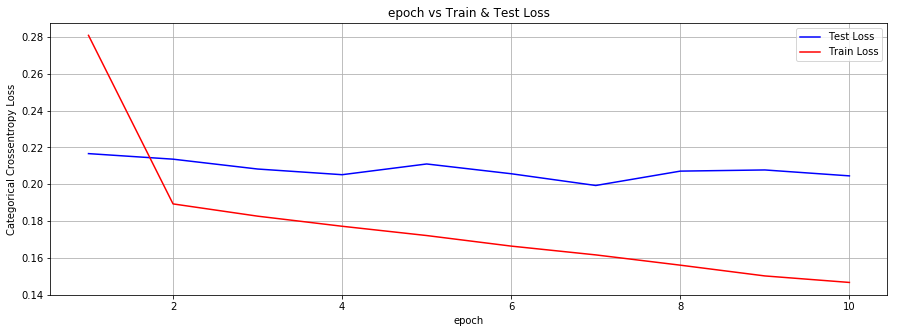

In [0]:
total_epochs=10
batch_size=1000
history=model.fit(X_train,y_train,batch_size=batch_size,epochs=total_epochs,
                          verbose=1,validation_data=(X_test,y_test))

train_loss=history.history['loss']
test_loss=history.history['val_loss']
train_acc=history.history['acc']
test_acc=history.history['val_acc']

print('Train accuracy={}% & Test accuracy={}% for {} epochs'
      .format(np.round(train_acc[-1]*100,3),np.round(test_acc[-1]*100,3),total_epochs))

epochs=list(range(1,total_epochs+1))
plot_epoch_vs_loss(epochs,test_loss,train_loss,colors=['b'])

<h3>1 LSTM Layer(100)+Dropout Layer(0.5)</h3>

In [0]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dropout(rate=0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 600, 32)           160032    
_________________________________________________________________
lstm_12 (LSTM)               (None, 100)               53200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 213,333
Trainable params: 213,333
Non-trainable params: 0
_________________________________________________________________
None


Train on 254919 samples, validate on 109252 samples
Epoch 1/10
254919/254919 [==============================] - 279s 1ms/step - loss: 0.2860 - acc: 0.8925 - val_loss: 0.2163 - val_acc: 0.9137
Epoch 2/10
254919/254919 [==============================] - 272s 1ms/step - loss: 0.1920 - acc: 0.9262 - val_loss: 0.2112 - val_acc: 0.9161
Epoch 3/10
254919/254919 [==============================] - 273s 1ms/step - loss: 0.1832 - acc: 0.9292 - val_loss: 0.2100 - val_acc: 0.9160
Epoch 4/10
254919/254919 [==============================] - 274s 1ms/step - loss: 0.1780 - acc: 0.9307 - val_loss: 0.2079 - val_acc: 0.9172
Epoch 5/10
254919/254919 [==============================] - 273s 1ms/step - loss: 0.1737 - acc: 0.9326 - val_loss: 0.2056 - val_acc: 0.9172
Epoch 6/10
254919/254919 [==============================] - 272s 1ms/step - loss: 0.1692 - acc: 0.9342 - val_loss: 0.2032 - val_acc: 0.9187
Epoch 7/10
254919/254919 [==============================] - 271s 1ms/step - loss: 0.1639 - acc: 0.9362 - val

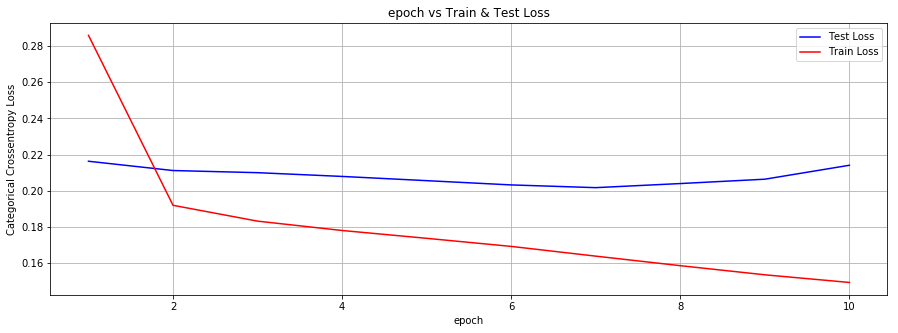

In [0]:
total_epochs=10
batch_size=1000
history=model.fit(X_train,y_train,batch_size=batch_size,epochs=total_epochs,
                          verbose=1,validation_data=(X_test,y_test))

train_loss=history.history['loss']
test_loss=history.history['val_loss']
train_acc=history.history['acc']
test_acc=history.history['val_acc']

print('Train accuracy={}% & Test accuracy={}% for {} epochs'
      .format(np.round(train_acc[-1]*100,3),np.round(test_acc[-1]*100,3),total_epochs))

epochs=list(range(1,total_epochs+1))
plot_epoch_vs_loss(epochs,test_loss,train_loss,colors=['b'])

<h3>1 LSTM Layer(50) with dropout(0.5)</h3>

In [16]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(50,dropout=0.5,recurrent_dropout=0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 600, 32)           160032    
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 176,683
Trainable params: 176,683
Non-trainable params: 0
_________________________________________________________________
None


Instructions for updating:
Use tf.cast instead.
Train on 254919 samples, validate on 109252 samples
Epoch 1/10
254919/254919 [==============================] - 293s 1ms/step - loss: 0.3287 - acc: 0.8776 - val_loss: 0.2386 - val_acc: 0.9048
Epoch 2/10
254919/254919 [==============================] - 292s 1ms/step - loss: 0.2243 - acc: 0.9123 - val_loss: 0.2204 - val_acc: 0.9118
Epoch 3/10
254919/254919 [==============================] - 292s 1ms/step - loss: 0.2089 - acc: 0.9188 - val_loss: 0.2205 - val_acc: 0.9132
Epoch 4/10
254919/254919 [==============================] - 292s 1ms/step - loss: 0.2004 - acc: 0.9224 - val_loss: 0.2165 - val_acc: 0.9152
Epoch 5/10
254919/254919 [==============================] - 293s 1ms/step - loss: 0.1941 - acc: 0.9246 - val_loss: 0.2178 - val_acc: 0.9165
Epoch 6/10
254919/254919 [==============================] - 294s 1ms/step - loss: 0.1902 - acc: 0.9262 - val_loss: 0.2158 - val_acc: 0.9166
Epoch 7/10
254919/254919 [==============================] - 

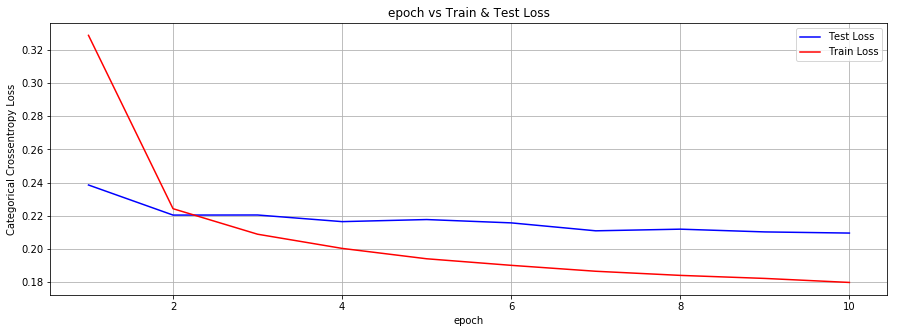

In [17]:
total_epochs=10
batch_size=1000
history=model.fit(X_train,y_train,batch_size=batch_size,epochs=total_epochs,
                          verbose=1,validation_data=(X_test,y_test))

train_loss=history.history['loss']
test_loss=history.history['val_loss']
train_acc=history.history['acc']
test_acc=history.history['val_acc']

print('Train accuracy={}% & Test accuracy={}% for {} epochs'
      .format(np.round(train_acc[-1]*100,3),np.round(test_acc[-1]*100,3),total_epochs))

epochs=list(range(1,total_epochs+1))
plot_epoch_vs_loss(epochs,test_loss,train_loss,colors=['b'])

<h3>1 LSTM Layer(50) with dropout(0.8), 10 epochs</h3>

In [18]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(50,dropout=0.8,recurrent_dropout=0.8))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 600, 32)           160032    
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 176,683
Trainable params: 176,683
Non-trainable params: 0
_________________________________________________________________
None


Train on 254919 samples, validate on 109252 samples
Epoch 1/10
254919/254919 [==============================] - 288s 1ms/step - loss: 0.2695 - acc: 0.8925 - val_loss: 0.2760 - val_acc: 0.8894
Epoch 2/10
254919/254919 [==============================] - 283s 1ms/step - loss: 0.2606 - acc: 0.8954 - val_loss: 0.2715 - val_acc: 0.8923
Epoch 3/10
254919/254919 [==============================] - 285s 1ms/step - loss: 0.2539 - acc: 0.8985 - val_loss: 0.2651 - val_acc: 0.8960
Epoch 4/10
254919/254919 [==============================] - 283s 1ms/step - loss: 0.2479 - acc: 0.9017 - val_loss: 0.2608 - val_acc: 0.8988
Epoch 5/10
254919/254919 [==============================] - 284s 1ms/step - loss: 0.2392 - acc: 0.9057 - val_loss: 0.2522 - val_acc: 0.9034
Epoch 6/10
254919/254919 [==============================] - 282s 1ms/step - loss: 0.2294 - acc: 0.9092 - val_loss: 0.2430 - val_acc: 0.9072
Epoch 7/10
254919/254919 [==============================] - 285s 1ms/step - loss: 0.2203 - acc: 0.9141 - val

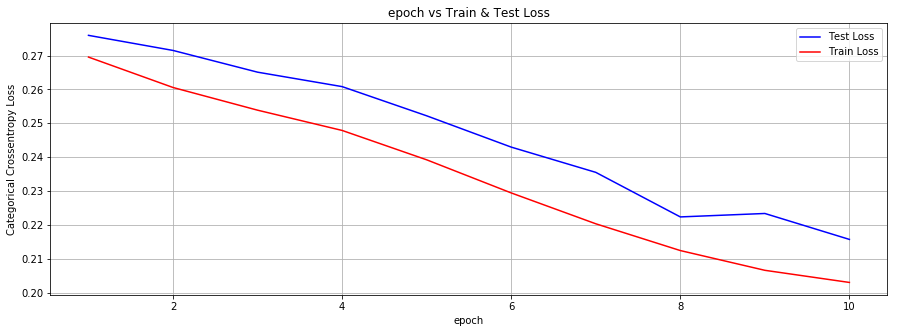

In [20]:
total_epochs=10
batch_size=1000
history=model.fit(X_train,y_train,batch_size=batch_size,epochs=total_epochs,
                          verbose=1,validation_data=(X_test,y_test))

train_loss=history.history['loss']
test_loss=history.history['val_loss']
train_acc=history.history['acc']
test_acc=history.history['val_acc']

print('Train accuracy={}% & Test accuracy={}% for {} epochs'
      .format(np.round(train_acc[-1]*100,3),np.round(test_acc[-1]*100,3),total_epochs))

epochs=list(range(1,total_epochs+1))
plot_epoch_vs_loss(epochs,test_loss,train_loss,colors=['b'])

<h3>1 LSTM Layer(50) with dropout(0.8), 25 epochs</h3>

In [17]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(50,dropout=0.8,recurrent_dropout=0.8))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 600, 32)           160032    
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 176,683
Trainable params: 176,683
Non-trainable params: 0
_________________________________________________________________
None


Instructions for updating:
Use tf.cast instead.
Train on 254919 samples, validate on 109252 samples
Epoch 1/25
254919/254919 [==============================] - 297s 1ms/step - loss: 0.4230 - acc: 0.8452 - val_loss: 0.3331 - val_acc: 0.8550
Epoch 2/25
254919/254919 [==============================] - 293s 1ms/step - loss: 0.3025 - acc: 0.8787 - val_loss: 0.2935 - val_acc: 0.8783
Epoch 3/25
254919/254919 [==============================] - 292s 1ms/step - loss: 0.2810 - acc: 0.8874 - val_loss: 0.2799 - val_acc: 0.8854
Epoch 4/25
254919/254919 [==============================] - 290s 1ms/step - loss: 0.2688 - acc: 0.8924 - val_loss: 0.2745 - val_acc: 0.8895
Epoch 5/25
254919/254919 [==============================] - 290s 1ms/step - loss: 0.2603 - acc: 0.8960 - val_loss: 0.2738 - val_acc: 0.8919
Epoch 6/25
254919/254919 [==============================] - 292s 1ms/step - loss: 0.2555 - acc: 0.8979 - val_loss: 0.2689 - val_acc: 0.8950
Epoch 7/25
254919/254919 [==============================] - 

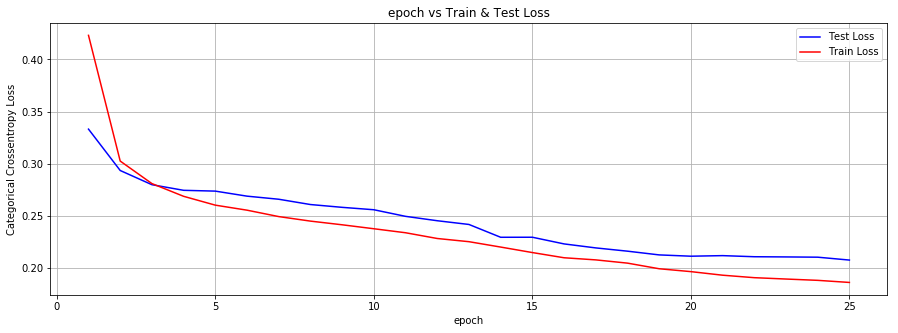

In [18]:
total_epochs=25
batch_size=1000
history=model.fit(X_train,y_train,batch_size=batch_size,epochs=total_epochs,
                          verbose=1,validation_data=(X_test,y_test))

train_loss=history.history['loss']
test_loss=history.history['val_loss']
train_acc=history.history['acc']
test_acc=history.history['val_acc']

print('Train accuracy={}% & Test accuracy={}% for {} epochs'
      .format(np.round(train_acc[-1]*100,3),np.round(test_acc[-1]*100,3),total_epochs))

epochs=list(range(1,total_epochs+1))
plot_epoch_vs_loss(epochs,test_loss,train_loss,colors=['b'])

<h3>2 LSTM Layers(25 & 10) with dropout(0.8), 10 epochs</h3>

In [20]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(25,dropout=0.8,recurrent_dropout=0.8,return_sequences=True))
model.add(LSTM(10,dropout=0.8,recurrent_dropout=0.8))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 600, 32)           160032    
_________________________________________________________________
lstm_4 (LSTM)                (None, 600, 25)           5800      
_________________________________________________________________
lstm_5 (LSTM)                (None, 10)                1440      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 167,283
Trainable params: 167,283
Non-trainable params: 0
_________________________________________________________________
None


Train on 254919 samples, validate on 109252 samples
Epoch 1/10
254919/254919 [==============================] - 576s 2ms/step - loss: 0.4873 - acc: 0.8243 - val_loss: 0.4431 - val_acc: 0.8253
Epoch 2/10
254919/254919 [==============================] - 573s 2ms/step - loss: 0.3431 - acc: 0.8656 - val_loss: 0.2887 - val_acc: 0.8861
Epoch 3/10
254919/254919 [==============================] - 571s 2ms/step - loss: 0.2851 - acc: 0.8842 - val_loss: 0.2780 - val_acc: 0.8913
Epoch 4/10
254919/254919 [==============================] - 566s 2ms/step - loss: 0.2701 - acc: 0.8906 - val_loss: 0.2692 - val_acc: 0.8947
Epoch 5/10
254919/254919 [==============================] - 566s 2ms/step - loss: 0.2603 - acc: 0.8948 - val_loss: 0.2627 - val_acc: 0.8978
Epoch 6/10
254919/254919 [==============================] - 570s 2ms/step - loss: 0.2544 - acc: 0.8985 - val_loss: 0.2616 - val_acc: 0.8994
Epoch 7/10
254919/254919 [==============================] - 571s 2ms/step - loss: 0.2496 - acc: 0.9008 - val

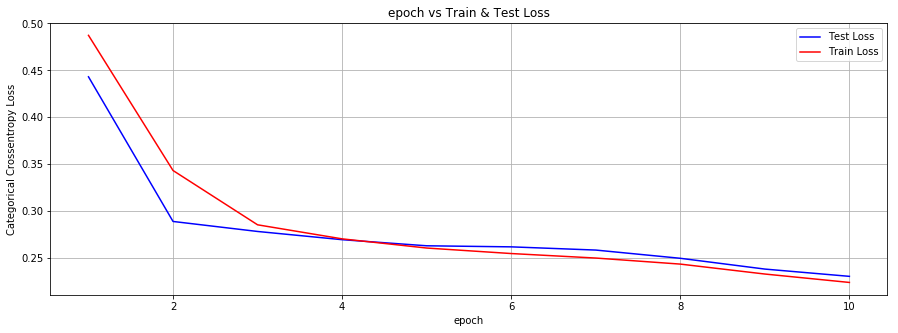

In [21]:
total_epochs=10
batch_size=1000
history=model.fit(X_train,y_train,batch_size=batch_size,epochs=total_epochs,
                          verbose=1,validation_data=(X_test,y_test))

train_loss=history.history['loss']
test_loss=history.history['val_loss']
train_acc=history.history['acc']
test_acc=history.history['val_acc']

print('Train accuracy={}% & Test accuracy={}% for {} epochs'
      .format(np.round(train_acc[-1]*100,3),np.round(test_acc[-1]*100,3),total_epochs))

epochs=list(range(1,total_epochs+1))
plot_epoch_vs_loss(epochs,test_loss,train_loss,colors=['b'])

<h3>2 LSTM Layers(30 & 15) with dropout(0.8 & 0.6), BatchNorm Layer, 15 epochs</h3>

In [25]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(30,dropout=0.8,recurrent_dropout=0.8,return_sequences=True))
model.add(BatchNormalization())
model.add(LSTM(15,dropout=0.6,recurrent_dropout=0.6))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 600, 32)           160032    
_________________________________________________________________
lstm_9 (LSTM)                (None, 600, 30)           7560      
_________________________________________________________________
batch_normalization_1 (Batch (None, 600, 30)           120       
_________________________________________________________________
lstm_10 (LSTM)               (None, 15)                2760      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 16        
Total params: 170,488
Trainable params: 170,428
Non-trainable params: 60
_________________________________________________________________
None


Train on 254919 samples, validate on 109252 samples
Epoch 1/15
254919/254919 [==============================] - 576s 2ms/step - loss: 0.4387 - acc: 0.8202 - val_loss: 0.3678 - val_acc: 0.8531
Epoch 2/15
254919/254919 [==============================] - 569s 2ms/step - loss: 0.3197 - acc: 0.8674 - val_loss: 0.2959 - val_acc: 0.8848
Epoch 3/15
254919/254919 [==============================] - 565s 2ms/step - loss: 0.2911 - acc: 0.8817 - val_loss: 0.2897 - val_acc: 0.8918
Epoch 4/15
254919/254919 [==============================] - 570s 2ms/step - loss: 0.2756 - acc: 0.8902 - val_loss: 0.2703 - val_acc: 0.8981
Epoch 5/15
254919/254919 [==============================] - 565s 2ms/step - loss: 0.2616 - acc: 0.8966 - val_loss: 0.2538 - val_acc: 0.9056
Epoch 6/15
254919/254919 [==============================] - 566s 2ms/step - loss: 0.2506 - acc: 0.9010 - val_loss: 0.2380 - val_acc: 0.9087
Epoch 7/15
254919/254919 [==============================] - 563s 2ms/step - loss: 0.2431 - acc: 0.9044 - val

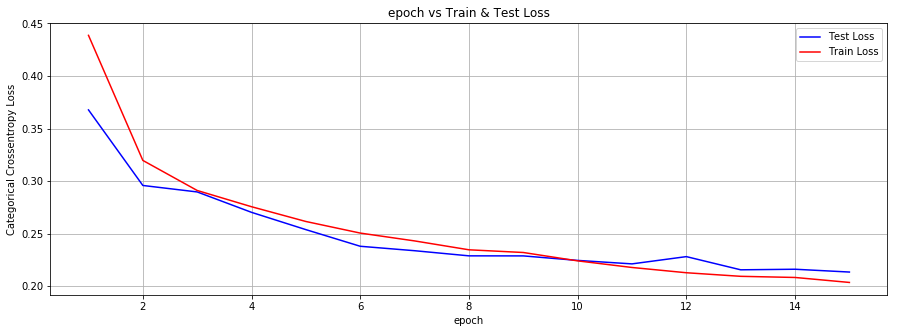

In [26]:
total_epochs=15
batch_size=1000
history=model.fit(X_train,y_train,batch_size=batch_size,epochs=total_epochs,
                          verbose=1,validation_data=(X_test,y_test))

train_loss=history.history['loss']
test_loss=history.history['val_loss']
train_acc=history.history['acc']
test_acc=history.history['val_acc']

print('Train accuracy={}% & Test accuracy={}% for {} epochs'
      .format(np.round(train_acc[-1]*100,3),np.round(test_acc[-1]*100,3),total_epochs))

epochs=list(range(1,total_epochs+1))
plot_epoch_vs_loss(epochs,test_loss,train_loss,colors=['b'])

In [1]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["n_layers","LSTM units","epochs","Batch Norm","Dropout","Train accuracy(%)","Test accuracy(%)","Model Status"]

x.add_row([1,100,10,"No","No",94.234,91.847,"Overfitting"])
x.add_row([1,50,10,"No","Yes(d_rate=0.5)",92.993,91.732,"Overfitting"])
x.add_row([1,50,10,"No","Yes(d_rate=0.8)",92.124,91.6,"well-fitted"])
x.add_row([1,50,25,"No","Yes(d_rate=0.8)",92.734,91.776,"well-fitted"])

x.add_row([2,"25 & 10",10,"No","Yes(d_rate=0.8)",91.321,91.049,"well-fitted"])
x.add_row([2,"30 & 15",15,"Yes","Yes(d_rate=0.8 & 0.6)",92.029,91.536,"well-fitted"])

## Overall Observations:

In [2]:
Performance Metrics from LSTM Analysis:

+----------+------------+--------+------------+-----------------------+-------------------+------------------+--------------+
| n_layers | LSTM units | epochs | Batch Norm |        Dropout        | Train accuracy(%) | Test accuracy(%) | Model Status |
+----------+------------+--------+------------+-----------------------+-------------------+------------------+--------------+
|    1     |    100     |   10   |     No     |           No          |       94.234      |      91.847      | Overfitting  |
|    1     |     50     |   10   |     No     |    Yes(d_rate=0.5)    |       92.993      |      91.732      | Overfitting  |
|    1     |     50     |   10   |     No     |    Yes(d_rate=0.8)    |       92.124      |       91.6       | well-fitted  |
|    1     |     50     |   25   |     No     |    Yes(d_rate=0.8)    |       92.734      |      91.776      | well-fitted  |
|    2     |  25 & 10   |   10   |     No     |    Yes(d_rate=0.8)    |       91.321      |      91.049      | well-fi

1) The LSTM RNN models are extremely overfitting. Dropouts with high drop rate is required to avoid overfitting. 

2) The models with drop rate=0.5 were also overfitting. So it is required to take high drop rate to avoid overfitting.

3) The time complexity is high compared to CNN's & MLP's. It makes sense as the input will be fed to RNN's in a seqential manner for each word in a sequence. 

4) On this dataset with 2-layer RNN's the performance of the model was not improved but the time complexity was doubled.